In [1]:
from sklearn import preprocessing
from sklearn import metrics

In [2]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, RNN, LSTM, GRU, SpatialDropout1D, Dropout

In [3]:
import matplotlib.pyplot as plt
import os, os.path, sys

Pravljenje Srednje vrednosti svih putanja. Napravljena je putanja ka direktorijumu koji sadrzi podatke za X-osu bez desinhronizacije, gde je potom iterirano kroz direktorijum i pokupljene su sve informacije iz adekvatnih txt fajlova

In [4]:
path = r"podaci\0k\X"

In [5]:
dir = os.listdir(path)

Napravljen je pandas DataFrame gde su atributi zasebno pokrenute putanje, dok ce ciljna promenljiva da bude srednja vrednost svih putanja

In [6]:
file_names = []
for file in dir:
    file_names.append(file)

In [7]:
main_df = pd.DataFrame()
for file in file_names:
    new_path = path + '\\' + file
    main_df[file] = pd.read_csv(new_path)

In [8]:
main_df = main_df[0:61000]
main_df = main_df.astype('int')

In [9]:
main_df.head()

,x-0k_v1.txt,x-0k_v10.txt,x-0k_v11.txt,x-0k_v12.txt,x-0k_v13.txt,x-0k_v14.txt,x-0k_v15.txt,x-0k_v16.txt,x-0k_v17.txt,x-0k_v18.txt,...,x-0k_v28.txt,x-0k_v29.txt,x-0k_v3.txt,x-0k_v30.txt,x-0k_v4.txt,x-0k_v5.txt,x-0k_v6.txt,x-0k_v7.txt,x-0k_v8.txt,x-0k_v9.txt
0,0,0,0,0,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,-1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,2,2,0,2,1,1,1,2,1,1,...,2,2,5,5,1,1,5,1,5,4
3,5,5,2,5,6,5,5,6,5,5,...,5,4,11,11,4,4,11,4,11,11
4,10,11,7,10,12,11,12,12,12,11,...,11,8,20,20,10,10,20,10,21,20


In [10]:
train_data = main_df['x-0k_v1.txt']
test_data = main_df['x-0k_v10.txt']

In [11]:
def SeriesSplit(data, time_steps):
    Y_ind = np.arange(time_steps, len(data), time_steps)
    Y = data[Y_ind]
    Y = Y.array.reshape(-1,1)

    rows_x = len(Y)
    X = data[range(time_steps*rows_x)]
    X = X.array.reshape(-1,1)
    return X,Y

In [12]:
time_steps = 20
x_train, y_train = SeriesSplit(train_data, time_steps)
x_test, y_test = SeriesSplit(test_data, time_steps)

In [13]:
Y_ind = np.arange(time_steps, len(train_data), time_steps)

In [14]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)

In [16]:
x_test = scaler.transform(x_test)
y_test = scaler.transform(y_test)

In [17]:
x_train = np.reshape(x_train, (len(y_train), time_steps,1))
x_test = np.reshape(x_test, (len(y_train), time_steps,1))

Potencijalni time_stepovi su (1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 61, 100), kako bi bili deljivi sa 61000

In [18]:
input_shape = (time_steps,1)

najbolji units = 16; batch size =2

best step = 20

In [19]:
np.random.seed(1234)

In [20]:
model = Sequential()
model.add(SimpleRNN(units = 16, input_shape = input_shape, activation = keras.layers.LeakyReLU()))
model.add(Dense(units = 32, activation=keras.layers.LeakyReLU()))
#model.add(Dropout(0.05))
model.add(Dense(units = 1, activation=keras.layers.LeakyReLU(), bias_initializer='zeros', kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [21]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 2, verbose = 2)

Epoch 1/10

1525/1525 - 8s - loss: 0.0031 - 8s/epoch - 5ms/step
Epoch 2/10
1525/1525 - 5s - loss: 3.0846e-05 - 5s/epoch - 3ms/step
Epoch 3/10
1525/1525 - 5s - loss: 5.4806e-05 - 5s/epoch - 3ms/step
Epoch 4/10
1525/1525 - 4s - loss: 2.9770e-05 - 4s/epoch - 3ms/step
Epoch 5/10
1525/1525 - 5s - loss: 2.4135e-05 - 5s/epoch - 3ms/step
Epoch 6/10
1525/1525 - 4s - loss: 2.4882e-05 - 4s/epoch - 3ms/step
Epoch 7/10
1525/1525 - 5s - loss: 3.2177e-05 - 5s/epoch - 3ms/step
Epoch 8/10
1525/1525 - 5s - loss: 2.8759e-05 - 5s/epoch - 3ms/step
Epoch 9/10
1525/1525 - 5s - loss: 1.8431e-05 - 5s/epoch - 3ms/step
Epoch 10/10
1525/1525 - 5s - loss: 3.7245e-05 - 5s/epoch - 3ms/step


In [22]:
train_scores = model.evaluate(x_test, y_test)

96/96 [==============================] - 1s 2ms/step - loss: 2.1936e-07


In [23]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

96/96 [==============================] - 0s 2ms/step


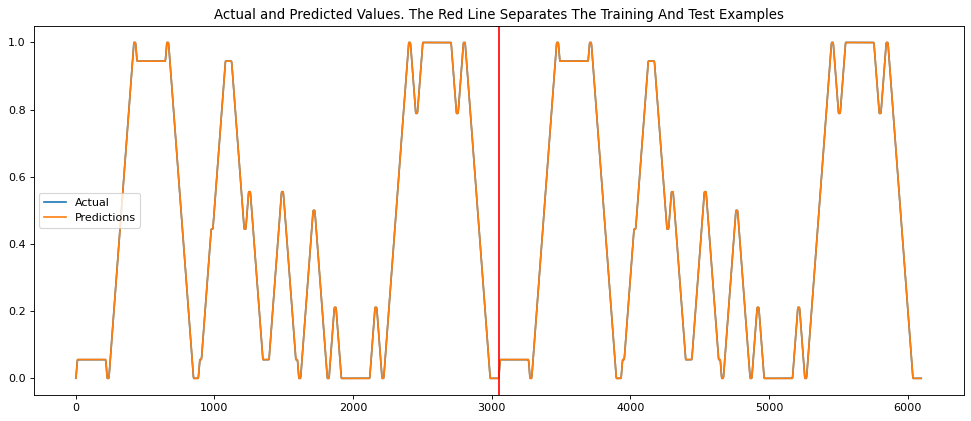

In [24]:
# Plot the result
def plot_result(trainY, testY, x_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(x_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(y_train, y_test, train_predict, test_predict)

In [25]:
max_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_max_koord_0k.txt", names=['x osa'])
min_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_min_koord_0k.txt", names=['x osa'])

In [26]:
max_koord = scaler.transform(max_koord)
min_koord = scaler.transform(min_koord)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [27]:
#plt.figure(figsize=(15,5))
#plt.plot(min_koord[8300:8500])
#plt.plot(max_koord[8300:8500])

In [28]:
num_correct = 0
for i in range(len(train_predict)):
    if train_predict[i] > min_koord[Y_ind][i] and train_predict[i] < max_koord[Y_ind][i]:
        print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(train_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])
        num_correct += 1

[16246.] [16254.006] [16255.]
[39247.] [39254.348] [39255.]
[40245.] [40253.332] [40254.]
[41244.] [41252.047] [41254.]
[42244.] [42251.336] [42258.]
[43246.] [43251.953] [43255.]
[44246.] [44249.895] [44258.]
[45247.] [45251.324] [45257.]
[46247.] [46251.402] [46256.]
[47247.] [47252.184] [47259.]
[48247.] [48251.516] [48253.]
[49245.] [49250.527] [49255.]
[50245.] [50248.086] [50254.]
[51244.] [51247.047] [51252.]
[52243.] [52246.15] [52255.]
[53246.] [53246.453] [53259.]
[54244.] [54247.6] [54258.]
[55247.] [55249.688] [55257.]
[56247.] [56247.223] [56258.]
[57248.] [57249.098] [57257.]
[58245.] [58245.25] [58257.]
[178188.] [178188.9] [178204.]
[177246.] [177251.61] [177258.]
[176235.] [176237.42] [176250.]
[173239.] [173241.02] [173245.]
[172239.] [172240.56] [172245.]
[170028.] [170047.3] [170087.]
[178592.] [178594.5] [178612.]
[176742.] [176742.66] [176750.]
[175741.] [175742.33] [175750.]
[174739.] [174741.9] [174748.]
[173737.] [173741.78] [173747.]
[172740.] [172741.69] [172

In [29]:
(num_correct/(len(train_predict)))

0.10528041980977369

In [30]:
for i in range(len(train_predict)):
    print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(train_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])

[115.] [17.517788] [135.]
[472.] [313.83377] [492.]
[1044.] [853.809] [1056.]
[1788.] [1578.4816] [1798.]
[2740.] [2491.2483] [2758.]
[3746.] [3443.4414] [3759.]
[4748.] [4485.8647] [4760.]
[5747.] [5629.362] [5761.]
[6750.] [6931.9546] [6759.]
[7750.] [8207.584] [7758.]
[8608.] [8914.361] [8616.]
[9251.] [9426.562] [9260.]
[9691.] [9809.199] [9716.]
[9933.] [10021.455] [9967.]
[10001.] [10056.954] [10025.]
[9999.] [10057.338] [10012.]
[9992.] [10057.549] [10008.]
[9993.] [10057.525] [10003.]
[9993.] [10057.525] [10003.]
[9994.] [10057.525] [10003.]
[9994.] [10057.525] [10003.]
[9994.] [10057.525] [10003.]
[9994.] [10057.525] [10003.]
[9994.] [10057.552] [10003.]
[9994.] [10057.528] [10003.]
[9993.] [10057.532] [10003.]
[9994.] [10057.532] [10003.]
[9993.] [10057.525] [10003.]
[9995.] [10057.525] [10003.]
[9995.] [10057.525] [10003.]
[9995.] [10057.524] [10003.]
[9995.] [10057.524] [10003.]
[9995.] [10057.525] [10003.]
[9995.] [10057.525] [10003.]
[9995.] [10057.525] [10003.]
[9995.] [

[161244.] [161209.95] [161257.]
[162246.] [162211.16] [162258.]
[163248.] [163212.31] [163257.]
[164249.] [164211.6] [164258.]
[165248.] [165211.75] [165258.]
[166247.] [166210.4] [166257.]
[167247.] [167210.77] [167257.]
[168247.] [168209.81] [168257.]
[169247.] [169209.06] [169257.]
[170246.] [170207.64] [170256.]
[171246.] [171207.73] [171256.]
[172247.] [172207.5] [172257.]
[173249.] [173209.64] [173259.]
[174252.] [174212.86] [174258.]
[175251.] [175209.92] [175259.]
[176253.] [176208.94] [176259.]
[177252.] [177209.78] [177260.]
[178210.] [178169.38] [178217.]
[178949.] [178914.42] [178960.]
[179507.] [179479.19] [179519.]
[179807.] [179796.03] [179860.]
[179989.] [179980.11] [180031.]
[179990.] [179983.53] [180029.]
[179990.] [179973.03] [180009.]
[179991.] [179972.56] [180005.]
[179990.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179994.] [179973.55] [180004.]
[179994.] [179973.55] [180004.]
[179994.] [179973.55] [180004.]
[179860.] [179846.53] [179887.]
[179510.] [

[167739.] [167741.9] [167747.]
[166740.] [166741.36] [166747.]
[165741.] [165742.47] [165747.]
[164741.] [164743.19] [164748.]
[163740.] [163742.5] [163748.]
[162739.] [162743.02] [162747.]
[161740.] [161744.81] [161747.]
[160740.] [160745.22] [160748.]
[159742.] [159746.86] [159749.]
[158742.] [158745.89] [158749.]
[157742.] [157746.78] [157750.]
[156744.] [156748.67] [156750.]
[155744.] [155750.28] [155751.]
[154745.] [154751.69] [154752.]
[153745.] [153753.33] [153752.]
[152745.] [152752.69] [152752.]
[151746.] [151753.72] [151754.]
[150746.] [150753.86] [150754.]
[149745.] [149752.9] [149752.]
[148744.] [148753.02] [148751.]
[147744.] [147752.61] [147749.]
[146743.] [146752.45] [146749.]
[145743.] [145752.48] [145749.]
[144743.] [144752.56] [144749.]
[143743.] [143752.97] [143750.]
[142743.] [142754.12] [142750.]
[141745.] [141756.36] [141752.]
[140746.] [140757.56] [140753.]
[139746.] [139758.55] [139753.]
[138746.] [138757.77] [138752.]
[137744.] [137758.11] [137753.]
[136744.] [

[65748.] [65744.71] [65755.]
[66746.] [66743.805] [66757.]
[67745.] [67741.984] [67758.]
[68745.] [68741.73] [68756.]
[69745.] [69740.836] [69756.]
[70745.] [70739.92] [70755.]
[71746.] [71740.1] [71757.]
[72745.] [72740.22] [72757.]
[73747.] [73739.69] [73757.]
[74748.] [74740.99] [74759.]
[75749.] [75742.14] [75758.]
[76747.] [76739.805] [76757.]
[77746.] [77737.125] [77757.]
[78611.] [78607.4] [78619.]
[79245.] [79245.43] [79258.]
[79705.] [79716.836] [79724.]
[79917.] [79957.46] [79953.]
[80002.] [80036.52] [80028.]
[79998.] [80029.9] [80019.]
[79992.] [80004.945] [80004.]
[79993.] [80004.695] [80003.]
[79995.] [80007.516] [80003.]
[79995.] [80007.46] [80003.]
[79995.] [80007.46] [80003.]
[79995.] [80007.46] [80003.]
[80018.] [80036.1] [80042.]
[80250.] [80262.88] [80291.]
[80732.] [80737.45] [80758.]
[81386.] [81393.74] [81408.]
[82241.] [82234.15] [82257.]
[83244.] [83237.04] [83257.]
[84245.] [84240.01] [84255.]
[85248.] [85241.99] [85259.]
[86248.] [86240.24] [86259.]
[87248.] 

[95748.] [95738.08] [95756.]
[96748.] [96737.05] [96756.]
[97747.] [97736.21] [97756.]
[98609.] [98598.76] [98620.]
[99235.] [99246.] [99256.]
[99693.] [99706.52] [99731.]
[99921.] [99941.76] [99949.]
[100004.] [100025.195] [100032.]
[99998.] [100011.21] [100018.]
[99992.] [99999.74] [100003.]
[99993.] [100000.05] [100003.]
[99994.] [99999.09] [100003.]
[99994.] [99999.1] [100003.]
[99994.] [99999.1] [100003.]
[99994.] [99999.1] [100003.]
[99953.] [99970.445] [99972.]
[99718.] [99748.695] [99747.]
[99242.] [99282.4] [99270.]
[98584.] [98615.38] [98612.]
[97737.] [97778.4] [97758.]
[96736.] [96769.64] [96751.]
[95744.] [95772.75] [95753.]
[94738.] [94774.516] [94753.]
[93744.] [93774.195] [93752.]
[92744.] [92774.83] [92754.]
[91745.] [91776.195] [91754.]
[90745.] [90778.266] [90756.]
[89741.] [89778.11] [89754.]
[88739.] [88777.48] [88753.]
[87742.] [87776.93] [87753.]
[86740.] [86776.836] [86752.]
[85740.] [85776.234] [85751.]
[84743.] [84778.555] [84753.]
[83744.] [83780.234] [83754.

[70242.] [70279.63] [70249.]
[69242.] [69280.16] [69249.]
[68241.] [68280.36] [68248.]
[67241.] [67280.4] [67249.]
[66241.] [66279.98] [66250.]
[65241.] [65282.363] [65249.]
[64242.] [64283.57] [64250.]
[63243.] [63284.51] [63251.]
[62241.] [62284.68] [62250.]
[61243.] [61285.17] [61251.]
[60244.] [60285.54] [60251.]
[59242.] [59286.906] [59252.]
[58242.] [58287.04] [58251.]
[57242.] [57286.652] [57250.]
[56243.] [56285.926] [56250.]
[55243.] [55286.37] [55250.]
[54243.] [54286.555] [54250.]
[53243.] [53287.562] [53251.]
[52243.] [52288.445] [52250.]
[51242.] [51288.74] [51251.]
[50243.] [50290.4] [50251.]
[49243.] [49290.49] [49252.]
[48243.] [48289.234] [48251.]
[47241.] [47288.12] [47250.]
[46241.] [46287.08] [46249.]
[45243.] [45291.297] [45250.]
[44241.] [44289.35] [44250.]
[43241.] [43291.086] [43250.]
[42243.] [42292.438] [42252.]
[41242.] [41292.805] [41252.]
[40243.] [40292.67] [40251.]
[39243.] [39293.98] [39250.]
[38242.] [38292.285] [38249.]
[37242.] [37291.848] [37248.]
[3

[4740.] [4561.1367] [4747.]
[3741.] [3502.5596] [3748.]
[2742.] [2561.7336] [2750.]
[1785.] [1608.4391] [1792.]
[1039.] [874.15186] [1046.]
[480.] [331.5868] [493.]
[145.] [49.232704] [175.]
[-29.] [-48.293446] [-7.]
[-26.] [-48.8428] [-3.]
[-23.] [-47.902058] [-2.]
[-18.] [-47.38631] [1.]
[-13.] [-45.943504] [2.]
[-8.] [-46.493057] [1.]
[-6.] [-46.25983] [1.]
[-6.] [-46.259434] [1.]
[-6.] [-46.25983] [1.]
[104.] [13.907754] [122.]
[462.] [303.80658] [490.]
[1035.] [854.249] [1053.]
[1788.] [1575.1257] [1806.]
[2739.] [2501.2473] [2758.]
[3745.] [3442.4873] [3760.]
[4746.] [4486.9785] [4759.]
[5747.] [5630.4795] [5760.]
[6750.] [6931.797] [6761.]
[7749.] [8207.494] [7760.]
[8749.] [9014.938] [8759.]
[9749.] [9844.442] [9760.]
[10747.] [10683.348] [10757.]
[11747.] [11593.522] [11756.]
[12748.] [12684.977] [12757.]
[13747.] [13708.378] [13756.]
[14747.] [14756.967] [14757.]
[15747.] [15759.057] [15757.]
[16749.] [16753.156] [16758.]
[17748.] [17746.22] [17758.]
[18748.] [18703.275] [187

[54244.] [54244.598] [54255.]
[55248.] [55248.695] [55255.]
[56248.] [56248.348] [56255.]
[57248.] [57248.9] [57255.]
[58244.] [58247.17] [58254.]
[59245.] [59244.81] [59254.]
[60244.] [60243.47] [60253.]
[61244.] [61243.133] [61253.]
[62245.] [62242.797] [62253.]
[63244.] [63241.625] [63252.]
[64246.] [64242.375] [64253.]
[65247.] [65244.8] [65255.]
[66245.] [66242.555] [66253.]
[67244.] [67241.086] [67254.]
[68245.] [68240.96] [68253.]
[69244.] [69240.63] [69253.]
[70244.] [70239.04] [70253.]
[71243.] [71238.79] [71257.]
[72245.] [72239.18] [72256.]
[73246.] [73238.13] [73256.]
[74247.] [74238.85] [74258.]
[75249.] [75240.336] [75258.]
[76248.] [76239.86] [76257.]
[77245.] [77238.586] [77255.]
[78244.] [78235.22] [78254.]
[79244.] [79234.86] [79258.]
[80244.] [80233.39] [80255.]
[81243.] [81234.58] [81255.]
[82243.] [82234.75] [82254.]
[83244.] [83234.65] [83255.]
[84246.] [84234.99] [84256.]
[85247.] [85237.59] [85260.]
[86247.] [86235.19] [86257.]
[87248.] [87234.86] [87255.]
[8824

[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.] [179973.55] [180004.]
[179995.

[147744.] [147752.14] [147750.]
[146744.] [146752.7] [146748.]
[145744.] [145752.7] [145749.]
[144743.] [144752.75] [144750.]
[143744.] [143753.42] [143750.]
[142744.] [142753.81] [142749.]
[141745.] [141756.11] [141752.]
[140746.] [140757.84] [140752.]
[139746.] [139757.92] [139753.]
[138745.] [138757.] [138753.]
[137745.] [137758.17] [137751.]
[136744.] [136757.48] [136750.]
[135744.] [135756.8] [135749.]
[134743.] [134755.98] [134749.]
[133743.] [133757.84] [133749.]
[132744.] [132757.75] [132750.]
[131745.] [131759.11] [131750.]
[130744.] [130759.66] [130751.]
[129744.] [129759.85] [129751.]
[128743.] [128759.4] [128750.]
[127744.] [127760.53] [127750.]
[126743.] [126759.08] [126749.]
[125742.] [125759.] [125750.]
[124741.] [124757.875] [124748.]
[123744.] [123761.59] [123750.]
[122745.] [122762.38] [122750.]
[121746.] [121765.11] [121752.]
[120748.] [120766.53] [120754.]
[119742.] [119767.85] [119756.]
[118740.] [118768.44] [118754.]
[117743.] [117768.76] [117754.]
[116741.] [1167